<a href="https://colab.research.google.com/github/buckerslondon/data-playground/blob/master/Covid19_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


!if [ -d COVID-19 ]; then (cd COVID-19;git pull); else git clone 'https://github.com/CSSEGISandData/COVID-19'; fi

time_series = './COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
confirmed = time_series + 'time_series_covid19_confirmed_global.csv'
deaths = time_series + 'time_series_covid19_deaths_global.csv'
recovered = time_series + 'time_series_covid19_recovered_global.csv'

cdf = pd.read_csv(confirmed)
ddf = pd.read_csv(deaths)
rdf = pd.read_csv(recovered)


Already up to date.


In [9]:
print ('Sizes of datasets: ', cdf.shape, ddf.shape, rdf.shape)

Sizes of datasets:  (254, 73) (254, 73) (240, 73)


drop latitude and longtitude and group to country - transpose to allow easy plotting

In [0]:
clean_cdf = cdf.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum().transpose()
clean_cdf.index = pd.to_datetime(clean_cdf.index)

clean_ddf = ddf.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum().transpose()
clean_ddf.index = pd.to_datetime(clean_ddf.index)

clean_rdf = rdf.drop(columns=['Lat', 'Long']).groupby(['Country/Region']).sum().transpose()
clean_rdf.index = pd.to_datetime(clean_rdf.index)

Take a look at confirmed cases across top x countries

In [0]:
#@title How many countries to analyse for confirmed cases?
how_many_countries =  10#@param {type:"integer"}
# sum columns into a series
top_countries = clean_cdf.sum(axis=0).sort_values(ascending=False).head(how_many_countries)

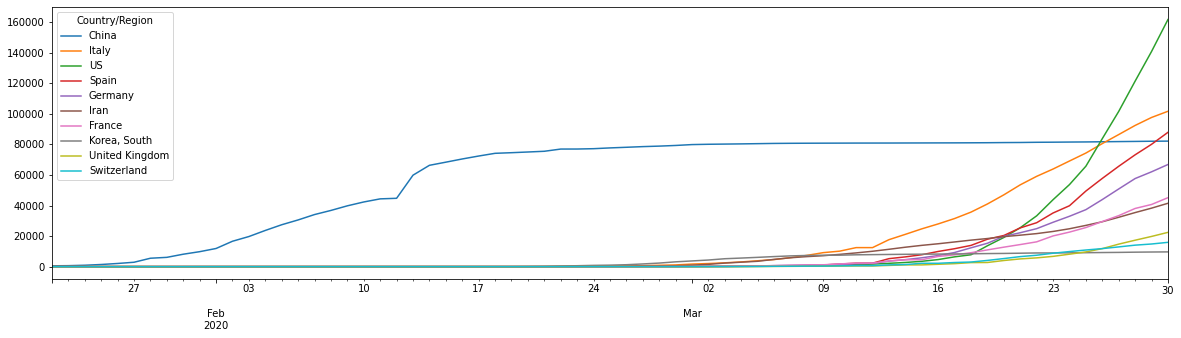

In [12]:
clean_cdf[top_countries.index.to_list()].plot(figsize=(20,5))

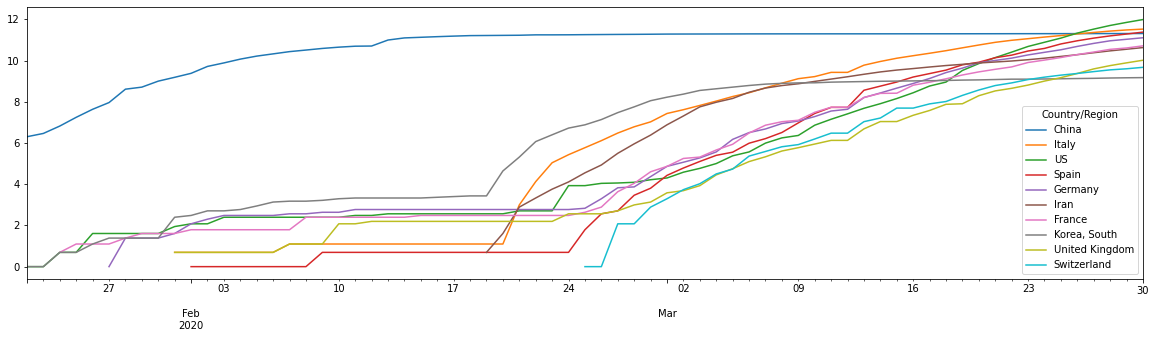

In [13]:
clean_cdf[top_countries.index.to_list()].apply(np.log).plot(figsize=(20,5))

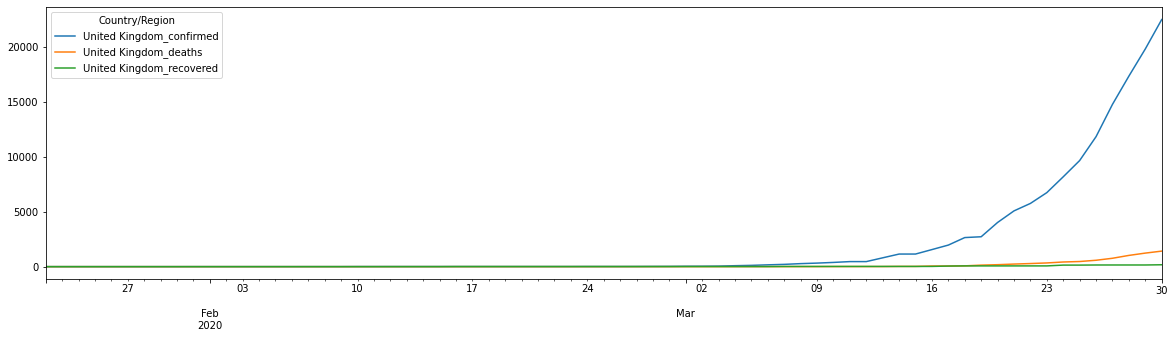

In [14]:
#@title Country to look at in more detail
country = "United Kingdom" #@param {type:"string"}
full_df_nontidy = pd.concat([clean_cdf.add_suffix('_confirmed'), clean_ddf.add_suffix('_deaths'), clean_rdf.add_suffix('_recovered')], axis=1, sort=False)
# bit crap this
country_in_detail = [c for c in full_df_nontidy.columns if c.find(country) > -1]
full_df_nontidy[country_in_detail].plot(figsize=(20,5))

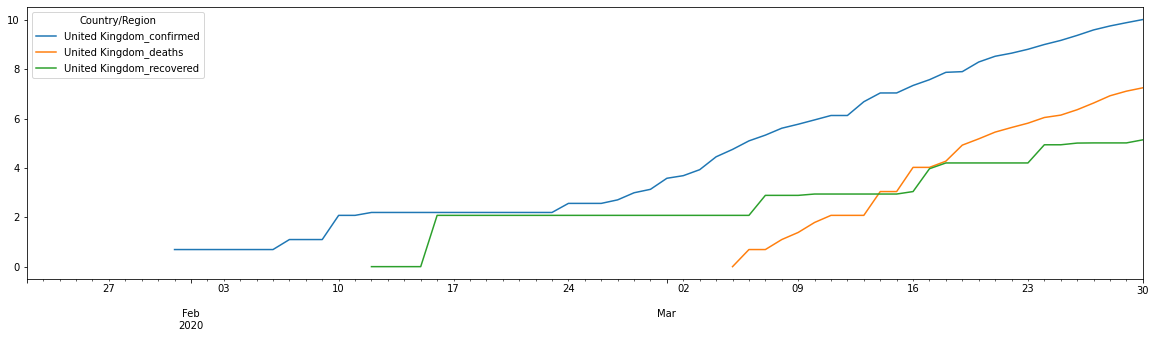

In [15]:
full_df_nontidy[country_in_detail].apply(np.log).plot(figsize=(20,5))

merge them all with keys to be able to index back

In [0]:
full_df = pd.concat([clean_cdf, clean_ddf, clean_rdf], keys = ['confirmed', 'deaths', 'recovered'])